In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv


In [2]:

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [3]:
train=pd.read_csv('../input/sign-language-mnist/sign_mnist_train.csv')
test=pd.read_csv('../input/sign-language-mnist/sign_mnist_test.csv')

In [ ]:
train.head()

In [4]:
train.shape


(27455, 785)

In [5]:
test.shape


(7172, 785)

In [6]:
x_train=train.drop(['label'],axis=1)
x_test=test.drop(['label'],axis=1)

In [7]:
y_train=train['label']
y_test=test['label']

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train.shape
x_test.shape

(7172, 784)

In [9]:
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)
x_train.shape
x_test.shape

(7172, 28, 28, 1)

Text(0.5, 1.0, 'label: 13  letter: M')

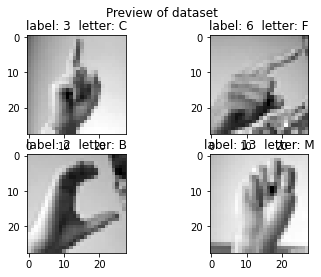

In [10]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(x_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(x_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(x_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(x_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

In [11]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train shape",x_train.shape)
print("x_test shape",x_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (21964, 28, 28, 1)
x_test shape (5491, 28, 28, 1)
y_train shape (21964, 24)
y_test shape (5491, 24)


In [13]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu',padding = 'same', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(128, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        
                        tf.keras.layers.Conv2D(512, (3, 3),padding = 'same', activation='relu'),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.Dense(24, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 512)         590336    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 512)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         2

In [14]:

model.compile( optimizer='rmsprop' , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 50 
batch_size = 200

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False, 
        zca_whitening=False,
        rotation_range=15, 
        zoom_range = 0.5,
        width_shift_range=0.15,  
        height_shift_range=0.15, 
        horizontal_flip=True,  
        vertical_flip=False)  

datagen.fit(x_train)

In [16]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
109/109 [==============================] - 8s 72ms/step - loss: 3.2318 - accuracy: 0.0561 - val_loss: 3.1237 - val_accuracy: 0.0585
Epoch 2/50
109/109 [==============================] - 7s 65ms/step - loss: 2.8350 - accuracy: 0.1439 - val_loss: 2.1353 - val_accuracy: 0.3404
Epoch 3/50
109/109 [==============================] - 7s 62ms/step - loss: 2.3408 - accuracy: 0.2703 - val_loss: 1.4775 - val_accuracy: 0.5265
Epoch 4/50
109/109 [==============================] - 8s 73ms/step - loss: 1.8184 - accuracy: 0.4141 - val_loss: 0.9257 - val_accuracy: 0.6596
Epoch 5/50
109/109 [==============================] - 7s 68ms/step - loss: 1.3886 - accuracy: 0.5448 - val_loss: 0.8830 - val_accuracy: 0.6649
Epoch 6/50
109/109 [==============================] - 7s 65ms/step - loss: 1.0553 - accuracy: 0.6491 - val_loss: 0.4710 - val_accuracy: 0.8505
Epoch 7/50
109/109 [==============================] - 7s 65ms/step - loss: 0.8129 - accuracy: 0.7240 - val_loss: 0.3094 - val_accuracy: 0.9066

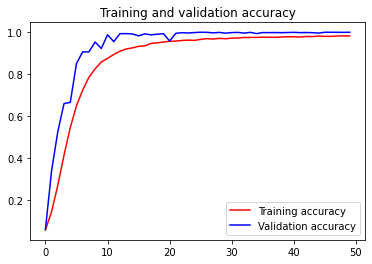

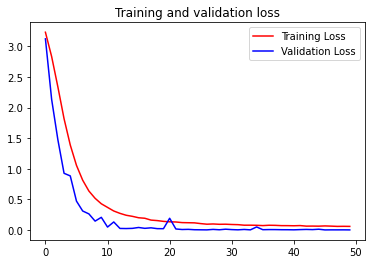

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()